In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv')
#data = pd.read_csv('train_lAUu6dG.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


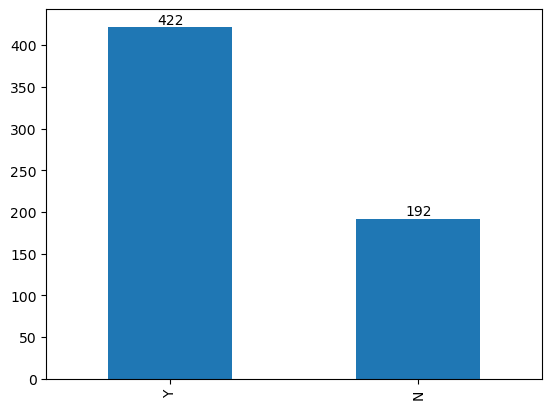

In [6]:
value_counts = data['Loan_Status'].value_counts()

# Create a bar plot
ax = value_counts.plot.bar()

# Add count of values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Display the plot
plt.show()

In [7]:
data.isnull().sum()     #count of missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

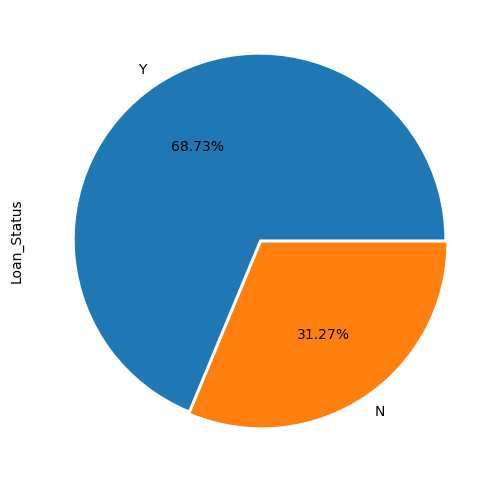

In [8]:
plt.figure(figsize=(6,6))
explode = [0.01,0.01]
data["Loan_Status"].value_counts().plot(kind = "pie",autopct = "%0.2f%%",explode=explode)
plt.show()

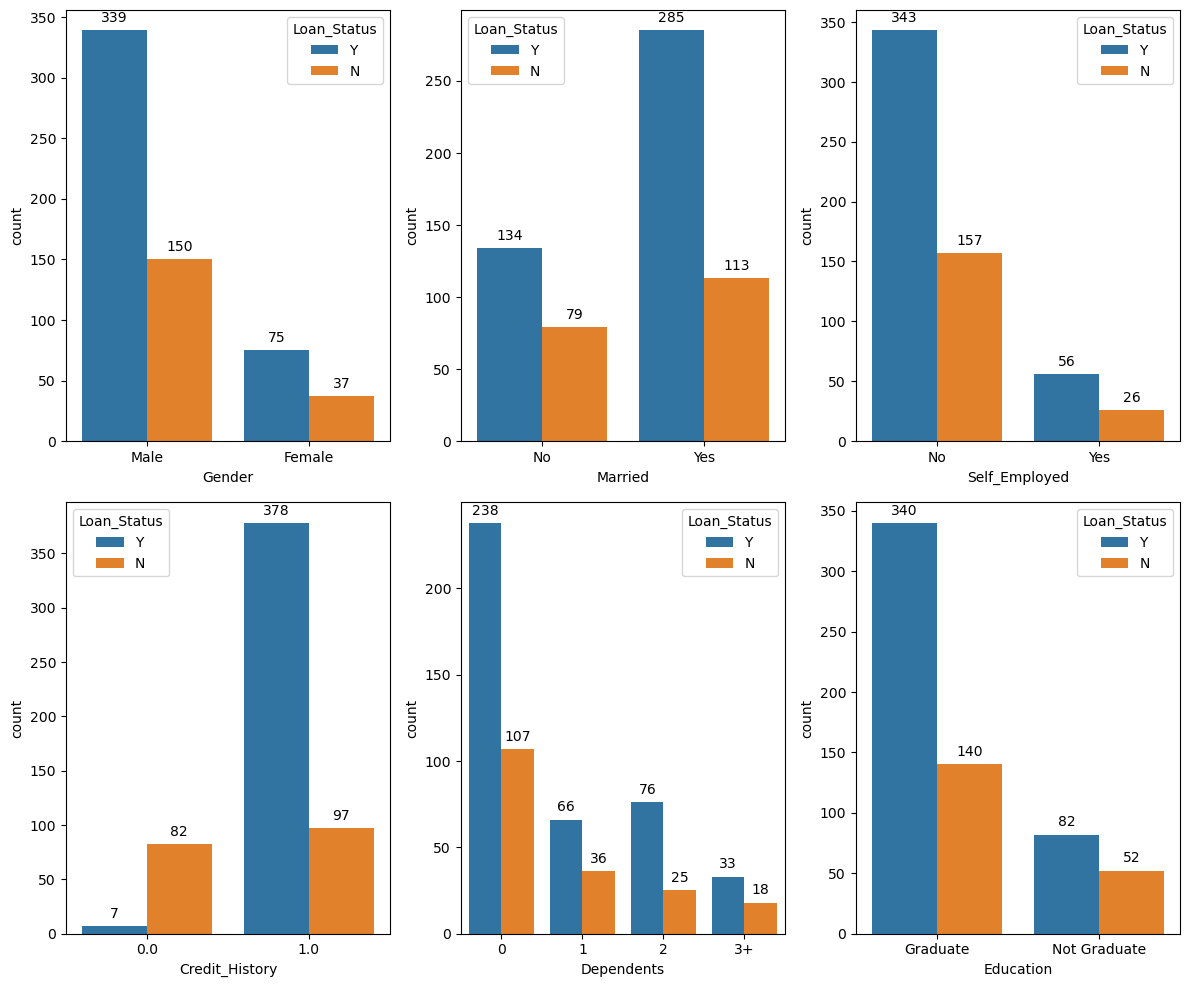

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(231)
ax1 = sns.countplot(data=data, x='Gender', hue='Loan_Status')
ax1.set_xlabel("Gender")
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(232)
ax2 = sns.countplot(data=data, x='Married', hue='Loan_Status')
ax2.set_xlabel("Married")
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(233)
ax3 = sns.countplot(data=data, x='Self_Employed', hue='Loan_Status')
ax3.set_xlabel("Self_Employed")
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(234)
ax4 = sns.countplot(data=data, x='Credit_History', hue='Loan_Status')
ax4.set_xlabel("Credit_History")
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(235)
ax5 = sns.countplot(data=data, x='Dependents', hue='Loan_Status')
ax5.set_xlabel("Dependents")
for p in ax5.patches:
    ax5.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.subplot(236)
ax6 = sns.countplot(data=data, x='Education', hue='Loan_Status')
ax6.set_xlabel("Education")
for p in ax6.patches:
    ax6.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [10]:
Property_Area_rate = pd.DataFrame(pd.crosstab(data.Property_Area,data.Loan_Status))

Property_Area_rate["Total"] = Property_Area_rate["Y"] + Property_Area_rate["N"]
Property_Area_rate["Approval_Rate"] = Property_Area_rate["Y"]/Property_Area_rate["Total"]*100
print(Property_Area_rate)

Loan_Status     N    Y  Total  Approval_Rate
Property_Area                               
Rural          69  110    179      61.452514
Semiurban      54  179    233      76.824034
Urban          69  133    202      65.841584


In [11]:
gender_rate = pd.DataFrame(pd.crosstab(data.Gender,data.Loan_Status))

gender_rate["Total"] = gender_rate["Y"] + gender_rate["N"]
gender_rate["Approval_Rate"] = gender_rate["Y"]/gender_rate["Total"]*100
print(gender_rate)

Loan_Status    N    Y  Total  Approval_Rate
Gender                                     
Female        37   75    112      66.964286
Male         150  339    489      69.325153


In [12]:
marital_status = pd.DataFrame(pd.crosstab(data.Married,data.Loan_Status))

marital_status["Total"] = marital_status["Y"] + marital_status["N"]
marital_status["Approval_Rate"] = marital_status["Y"]/marital_status["Total"]*100
print(marital_status)

Loan_Status    N    Y  Total  Approval_Rate
Married                                    
No            79  134    213      62.910798
Yes          113  285    398      71.608040


In [13]:
self_employed = pd.DataFrame(pd.crosstab(data.Self_Employed,data.Loan_Status))

self_employed["Total"] = self_employed["Y"] + self_employed["N"]
self_employed["Approval_Rate"] = self_employed["Y"]/self_employed["Total"]*100
print(self_employed)

Loan_Status      N    Y  Total  Approval_Rate
Self_Employed                                
No             157  343    500      68.600000
Yes             26   56     82      68.292683


In [14]:
Education_status = pd.DataFrame(pd.crosstab(data.Education,data.Loan_Status))

Education_status["Total"] = Education_status["Y"] + Education_status["N"]
Education_status["Approval_Rate"] = Education_status["Y"]/Education_status["Total"]*100
print(Education_status)

Loan_Status     N    Y  Total  Approval_Rate
Education                                   
Graduate      140  340    480      70.833333
Not Graduate   52   82    134      61.194030


In [15]:
Dependents_status = pd.DataFrame(pd.crosstab(data.Dependents,data.Loan_Status))

Dependents_status["Total"] = Dependents_status["Y"] + Dependents_status["N"]
Dependents_status["Approval_Rate"] = Dependents_status["Y"]/Dependents_status["Total"]*100
print(Dependents_status)

Loan_Status    N    Y  Total  Approval_Rate
Dependents                                 
0            107  238    345      68.985507
1             36   66    102      64.705882
2             25   76    101      75.247525
3+            18   33     51      64.705882


### DATA PROCESSING

In [16]:
data['Loan_Status'].replace('Y',1,inplace = True)
data['Loan_Status'].replace('N',0,inplace = True)

In [17]:
Loan_status=data.Loan_Status
data.drop('Loan_Status',axis=1,inplace=True)
data.drop('Self_Employed',axis=1,inplace=True)
data.drop('Gender',axis=1,inplace=True)
data.drop('Loan_ID',axis=1,inplace=True)

In [18]:
data.shape

(614, 9)

In [19]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,No,0,Graduate,5849,0.0,NaN,360.0,1.0,Urban
1,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural
2,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban
3,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban
4,No,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban


In [20]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,No,0,Graduate,5849,0.0,NaN,360.0,1.0,Urban
1,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural
2,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban
3,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban
4,No,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban


In [21]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


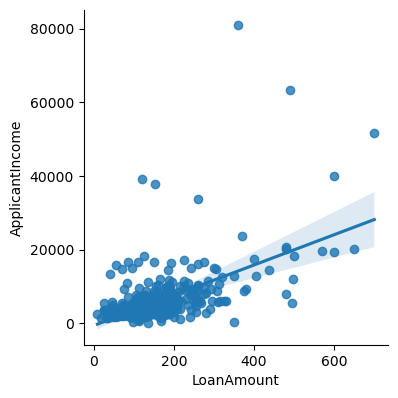

In [22]:
sns.pairplot(data,x_vars = ["LoanAmount"],y_vars = ["ApplicantIncome"],height=4,aspect =1,kind = "reg")
plt.show()

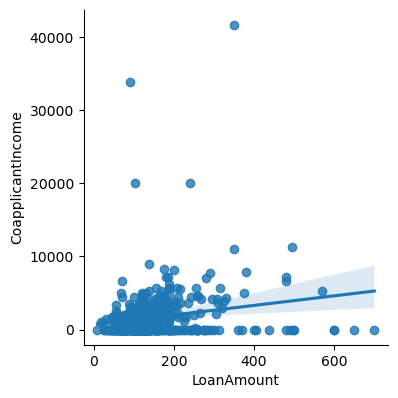

In [23]:
sns.pairplot(data,x_vars = ["LoanAmount"],y_vars = ["CoapplicantIncome"],height=4,aspect =1,kind = "reg")
plt.show()

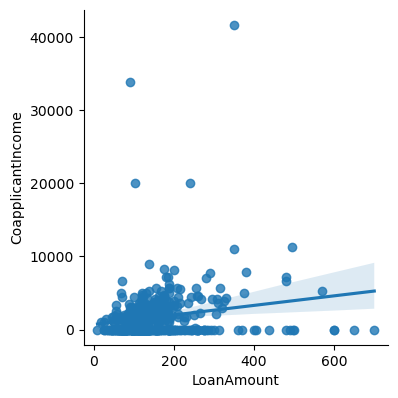

In [24]:
sns.pairplot(data,x_vars = ["LoanAmount"],y_vars = ["CoapplicantIncome"],height=4,aspect =1,kind = "reg")
plt.show()

In [25]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

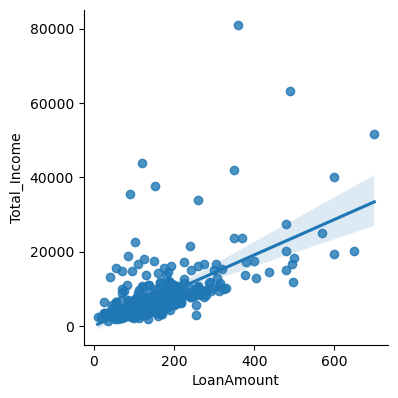

In [26]:
sns.pairplot(data,x_vars = ["LoanAmount"],y_vars = ["Total_Income"],height=4,aspect =1,kind = "reg")
plt.show()

In [27]:
data.isnull().sum()

Married               3
Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Total_Income          0
dtype: int64

In [28]:
#data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
#data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])

In [29]:
# fill the missing values for numerical terms - mean
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [30]:
data.isnull().sum()

Married              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

In [31]:
#Normalize

data['Dependents'].replace('3+',3,inplace = True)
data['Dependents'].replace('2',2,inplace = True)
data['Dependents'].replace('1',1,inplace = True)
data['Dependents'].replace('0',0,inplace = True)
#data['Gender'].replace('Male',1,inplace = True)
#data['Gender'].replace('Female',0,inplace = True)
data['Married'].replace('Yes',1,inplace = True)
data['Married'].replace('No',0,inplace = True)
data['Education'].replace('Graduate',1,inplace = True)
data['Education'].replace('Not Graduate',0,inplace = True)
#data['Self_Employed'].replace('Yes',1,inplace = True)
#data['Self_Employed'].replace('No',0,inplace = True)
data['Property_Area'].replace('Urban',2,inplace = True)
data['Property_Area'].replace('Semiurban',1,inplace = True)
data['Property_Area'].replace('Rural',0,inplace = True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int64  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int64  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int64  
 9   Total_Income       614 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 48.1 KB


In [33]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,0,1,5849,0.0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,6091.0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,2,3000.0
3,1,0,0,2583,2358.0,120.000000,360.0,1.0,2,4941.0
4,0,0,1,6000,0.0,141.000000,360.0,1.0,2,6000.0


#### Apply log transformation to the attribute for normalization

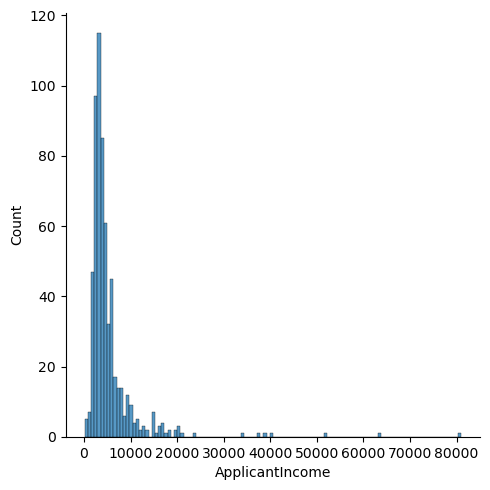

In [34]:
sns.displot(data['ApplicantIncome'])

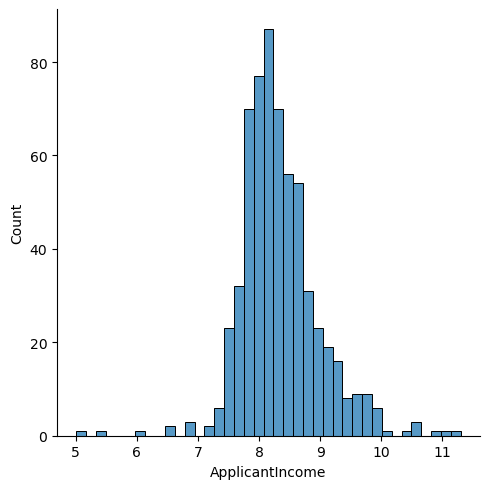

In [35]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
sns.displot(data['ApplicantIncome'])

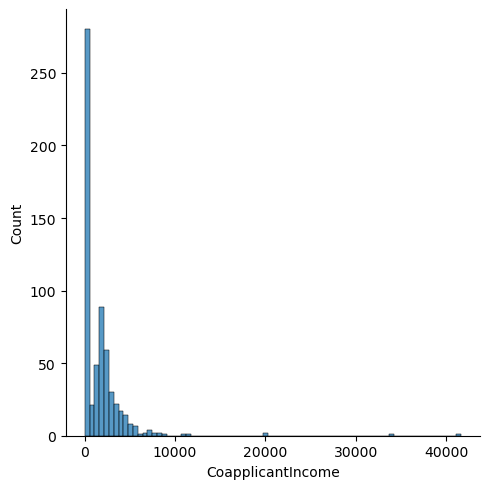

In [36]:
sns.displot(data['CoapplicantIncome'])

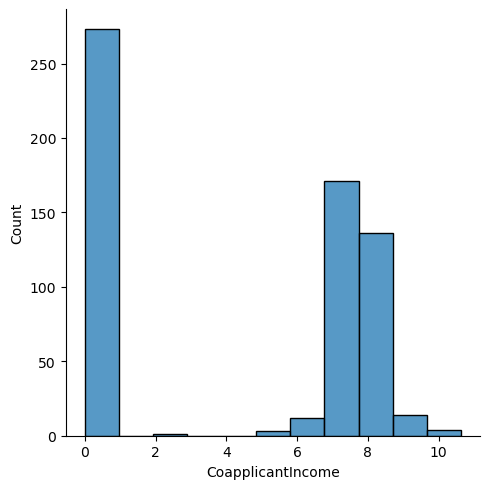

In [37]:
#data['CoapplicantIncome'] = np.log(data['CoapplicantIncome'])
data['CoapplicantIncome'] = np.log(data['CoapplicantIncome'] + 1)
sns.displot(data['CoapplicantIncome'])

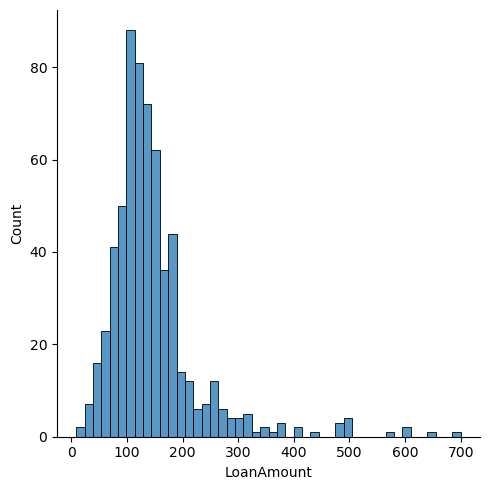

In [38]:
sns.displot(data['LoanAmount'])

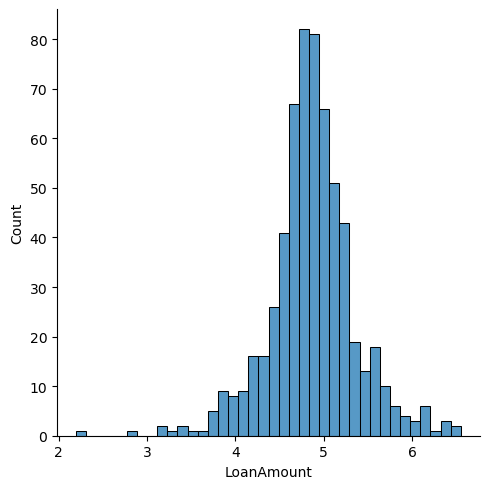

In [39]:
data['LoanAmount'] = np.log(data['LoanAmount'])
sns.displot(data['LoanAmount'])

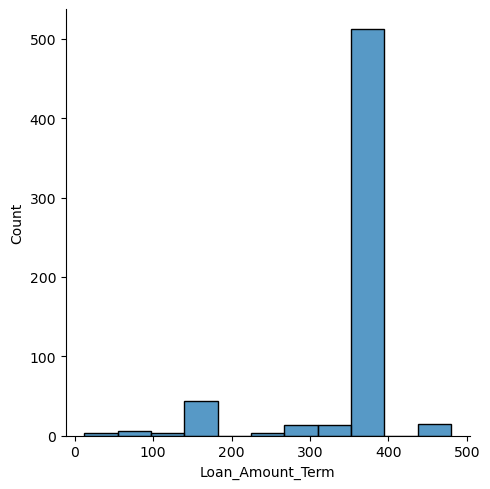

In [40]:
sns.displot(data['Loan_Amount_Term'])

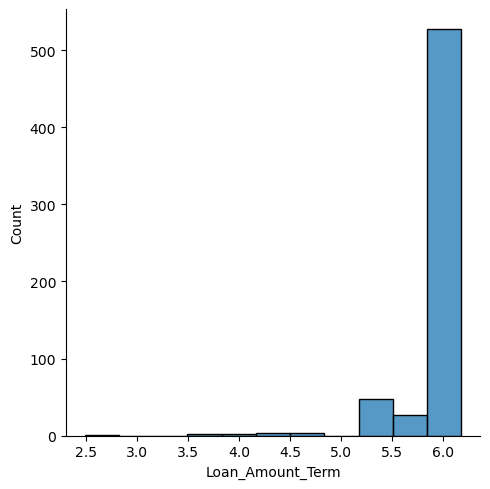

In [41]:
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])
sns.displot(data['Loan_Amount_Term'])

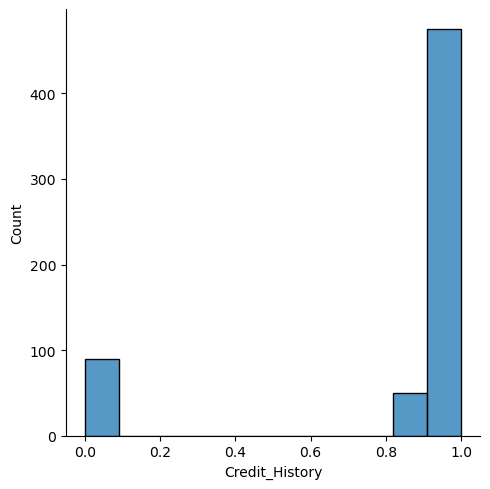

In [42]:
sns.displot(data['Credit_History'])

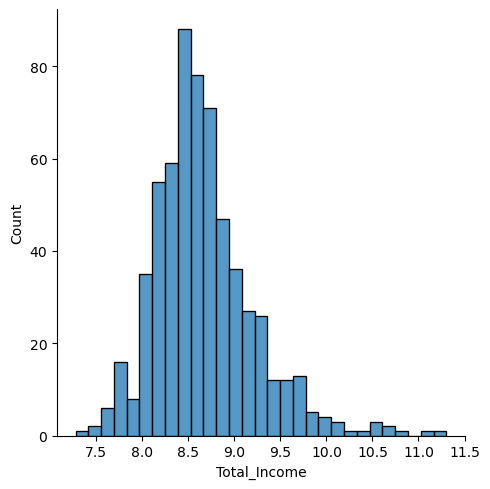

In [43]:
data['Total_Income'] = np.log(data['Total_Income'])
sns.displot(data['Total_Income'])

In [44]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,0,1,8.674026,0.000000,4.986426,5.886104,1.0,2,8.674026
1,1,1,1,8.430109,7.319202,4.852030,5.886104,1.0,0,8.714568
2,1,0,1,8.006368,0.000000,4.189655,5.886104,1.0,2,8.006368
3,1,0,0,7.856707,7.765993,4.787492,5.886104,1.0,2,8.505323
4,0,0,1,8.699515,0.000000,4.948760,5.886104,1.0,2,8.699515


### TRAIN AND TEST MODELS

In [45]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,0,1,8.674026,0.000000,4.986426,5.886104,1.0,2,8.674026
1,1,1,1,8.430109,7.319202,4.852030,5.886104,1.0,0,8.714568
2,1,0,1,8.006368,0.000000,4.189655,5.886104,1.0,2,8.006368
3,1,0,0,7.856707,7.765993,4.787492,5.886104,1.0,2,8.505323
4,0,0,1,8.699515,0.000000,4.948760,5.886104,1.0,2,8.699515


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [47]:
# Set random seed for reproducibility
np.random.seed(42)

# Data Splitting
#train_X = data.iloc[:614, :]
train_y = Loan_status
#X_test = data.iloc[614:, :]

# print("Shape of X Train: ", train_X.shape)
# print("Shape of X Test: ", X_test.shape)
# print("Shape of y Train: ", train_y.shape)

train_X, test_X, train_y, test_y = train_test_split(data, train_y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_regression_model = LogisticRegression(class_weight='balanced')
logistic_regression_model.fit(train_X, train_y)

y_pred_logistic_regression_train = logistic_regression_model.predict(train_X)
accuracy_logistic_regression_train = accuracy_score(train_y, y_pred_logistic_regression_train)
print("Accuracy Score for Logistic Regression train data:", round(accuracy_logistic_regression_train * 100, 3), "%")

y_pred_logistic_regression = logistic_regression_model.predict(test_X)
accuracy_logistic_regression = accuracy_score(test_y, y_pred_logistic_regression)
print("Accuracy Score for Logistic Regression test data:", round(accuracy_logistic_regression * 100, 3), "%")

Accuracy Score for Logistic Regression train data: 77.393 %
Accuracy Score for Logistic Regression test data: 79.675 %


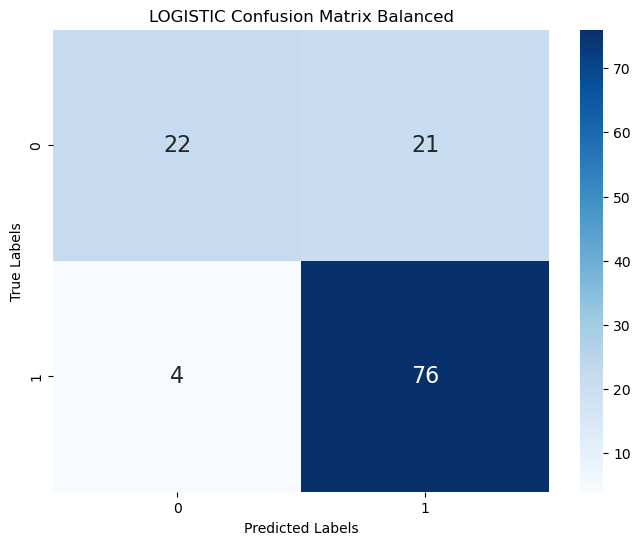

Testing Precision: 0.7835051546391752
Testing Recall: 0.95
Testing F1 Score: 0.8587570621468925


In [48]:
#Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate confusion matrix for the testing set
logistic_cm = confusion_matrix(test_y, y_pred_logistic_regression)

# Calculate precision, recall, and F1 score for the testing set
logistic_test_precision = precision_score(test_y, y_pred_logistic_regression)
logistic_test_recall = recall_score(test_y, y_pred_logistic_regression)
logistic_test_f1 = f1_score(test_y, y_pred_logistic_regression)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('LOGISTIC Confusion Matrix Balanced')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display precision, recall, and F1 score
print("Testing Precision:", logistic_test_precision)
print("Testing Recall:", logistic_test_recall)
print("Testing F1 Score:", logistic_test_f1)

In [49]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(logistic_regression_model, train_X, train_y, cv=5)
print("Cross-Validation Scores Logistic Balanced:", scores)
print("Mean Accuracy Logistic Balanced:", scores.mean())

Cross-Validation Scores Logistic Balanced: [0.84848485 0.69387755 0.68367347 0.75510204 0.76530612]
Mean Accuracy Logistic Balanced: 0.7492888064316636


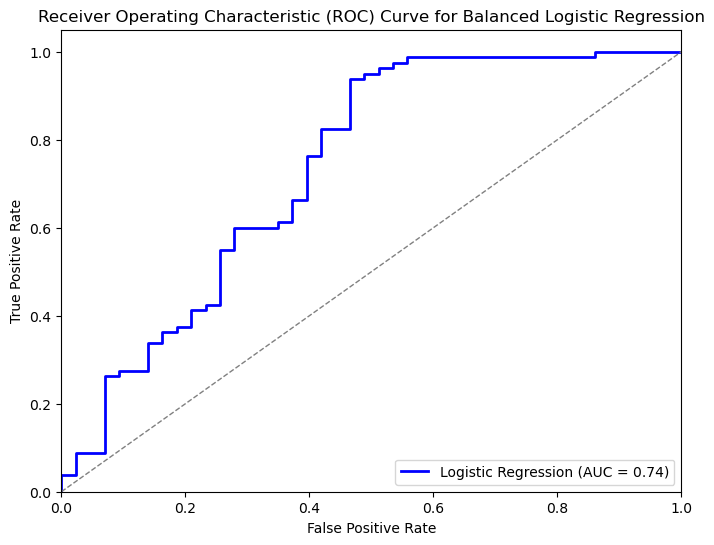

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression model
logistic_pred_probs = logistic_regression_model.predict_proba(test_X)[:, 1]

# Calculate ROC curve for Logistic Regression model
fpr_logistic, tpr_logistic, _ = roc_curve(test_y, logistic_pred_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot ROC curve for Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Balanced Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [51]:
# Decision Tree Classifier
#train_y = Loan_status
#train_X, test_X, train_y, test_y = train_test_split(data, train_y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(class_weight='balanced') 
decision_tree_model.fit(train_X, train_y)

y_pred_decision_tree_train = decision_tree_model.predict(train_X)
accuracy_decision_tree_train = accuracy_score(train_y, y_pred_decision_tree_train)
print("Accuracy Score for Decision Tree Classifier train data:", round(accuracy_decision_tree_train * 100, 3), "%")

y_pred_decision_tree = decision_tree_model.predict(test_X)
accuracy_decision_tree = accuracy_score(test_y, y_pred_decision_tree)
print("Accuracy Score for Decision Tree Classifier test data:", round(accuracy_decision_tree * 100, 3), "%")

Accuracy Score for Decision Tree Classifier train data: 100.0 %
Accuracy Score for Decision Tree Classifier test data: 65.041 %


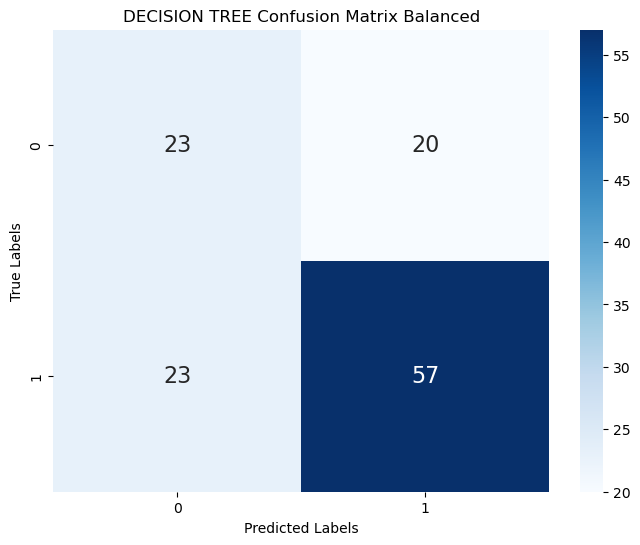

Testing Precision: 0.7402597402597403
Testing Recall: 0.7125
Testing F1 Score: 0.7261146496815287


In [52]:
#Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the testing set
dt_cm = confusion_matrix(test_y, y_pred_decision_tree)

# Calculate precision, recall, and F1 score for the testing set
dt_test_precision = precision_score(test_y, y_pred_decision_tree)
dt_test_recall = recall_score(test_y, y_pred_decision_tree)
dt_test_f1 = f1_score(test_y, y_pred_decision_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('DECISION TREE Confusion Matrix Balanced')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display precision, recall, and F1 score
print("Testing Precision:", dt_test_precision)
print("Testing Recall:", dt_test_recall)
print("Testing F1 Score:", dt_test_f1)

In [53]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(decision_tree_model, train_X, train_y, cv=5)
print("Cross-Validation Scores DT (not-pruned):", scores)
print("Mean Accuracy DT (not-pruned):", scores.mean())

Cross-Validation Scores DT (not-pruned): [0.67676768 0.7244898  0.7244898  0.78571429 0.68367347]
Mean Accuracy DT (not-pruned): 0.7190270047412904


In [54]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with limited depth and minimum samples per leaf
decision_tree_model_pruned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,class_weight='balanced')

# Fit the pruned model to the training data
decision_tree_model_pruned.fit(train_X, train_y)

# Evaluate the pruned model's performance on training data
accuracy_decision_tree_pruned_train = decision_tree_model_pruned.score(train_X, train_y)
print("Accuracy Score for Pruned Decision Tree Classifier (Train):", round(accuracy_decision_tree_pruned_train * 100, 3), "%")

# Evaluate the pruned model's performance on test data
accuracy_decision_tree_pruned_test = decision_tree_model_pruned.score(test_X, test_y)
print("Accuracy Score for Pruned Decision Tree Classifier (Test):", round(accuracy_decision_tree_pruned_test * 100, 3), "%")

Accuracy Score for Pruned Decision Tree Classifier (Train): 76.782 %
Accuracy Score for Pruned Decision Tree Classifier (Test): 64.228 %


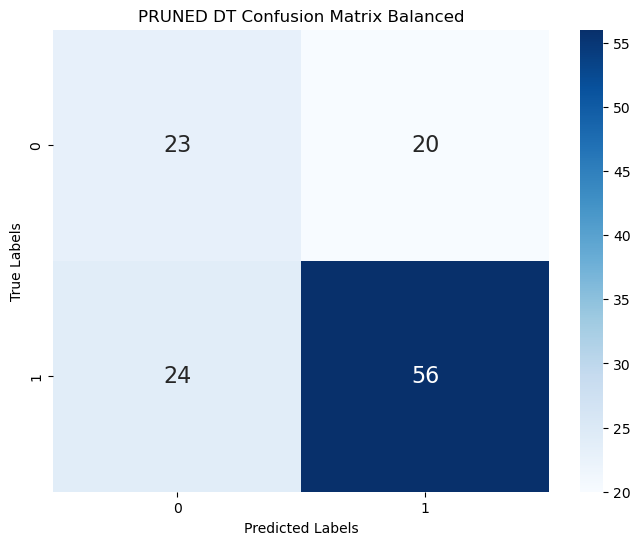

Testing Precision: 0.7368421052631579
Testing Recall: 0.7
Testing F1 Score: 0.717948717948718


In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for the test set
predicted_labels = decision_tree_model_pruned.predict(test_X)

# Generate confusion matrix
dt_p_cm = confusion_matrix(test_y, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_p_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('PRUNED DT Confusion Matrix Balanced')
plt.show()

# Calculate precision, recall, and F1 score for the testing set
dt_p_test_precision = precision_score(test_y, predicted_labels)
dt_p_test_recall = recall_score(test_y, predicted_labels)
dt_p_test_f1 = f1_score(test_y, predicted_labels)

# Display precision, recall, and F1 score
print("Testing Precision:", dt_p_test_precision)
print("Testing Recall:", dt_p_test_recall)
print("Testing F1 Score:", dt_p_test_f1)

In [56]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(decision_tree_model_pruned, train_X, train_y, cv=5)
print("Cross-Validation Scores DT (pruned):", scores)
print("Mean Accuracy DT (pruned):", scores.mean())

Cross-Validation Scores DT (pruned): [0.6969697  0.7244898  0.7244898  0.76530612 0.75510204]
Mean Accuracy DT (pruned): 0.7332714904143476


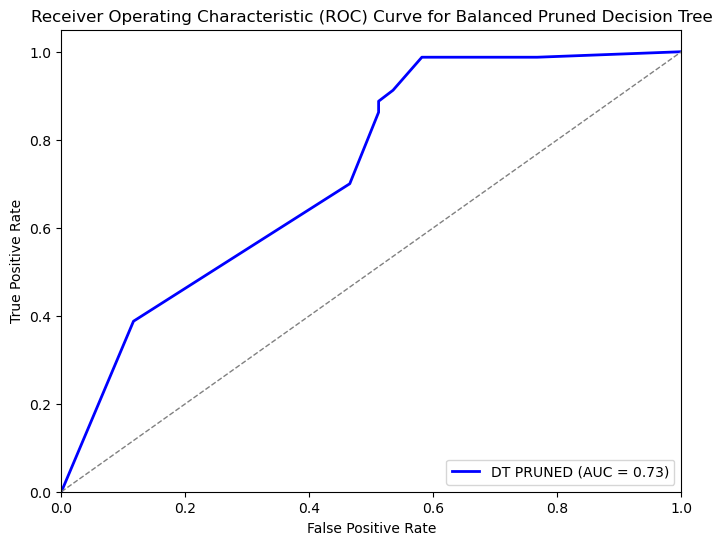

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression model
dt_p_pred_probs = decision_tree_model_pruned.predict_proba(test_X)[:, 1]

# Calculate ROC curve for Logistic Regression model
fpr_dt, tpr_dt, _ = roc_curve(test_y, dt_p_pred_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'DT PRUNED (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Balanced Pruned Decision Tree')
plt.legend(loc='lower right')
plt.show()


In [58]:
# Random Forest Classifier
random_forest_model = RandomForestClassifier(class_weight='balanced')
random_forest_model.fit(train_X, train_y)

y_pred_random_forest_train = random_forest_model.predict(train_X)
accuracy_random_forest_train = accuracy_score(train_y, y_pred_random_forest_train)
print("Accuracy Score for Random Forest Classifier train result:", round(accuracy_random_forest_train * 100, 3), "%")

y_pred_random_forest = random_forest_model.predict(test_X)
accuracy_random_forest = accuracy_score(test_y, y_pred_random_forest)
print("Accuracy Score for Random Forest Classifier test result:", round(accuracy_random_forest * 100, 3), "%")

Accuracy Score for Random Forest Classifier train result: 100.0 %
Accuracy Score for Random Forest Classifier test result: 78.862 %


In [59]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(random_forest_model, train_X, train_y, cv=5)
print("Cross-Validation Scores RF:", scores)
print("Mean Accuracy RF:", scores.mean())

Cross-Validation Scores RF: [0.84848485 0.76530612 0.7755102  0.78571429 0.79591837]
Mean Accuracy RF: 0.794186765615337


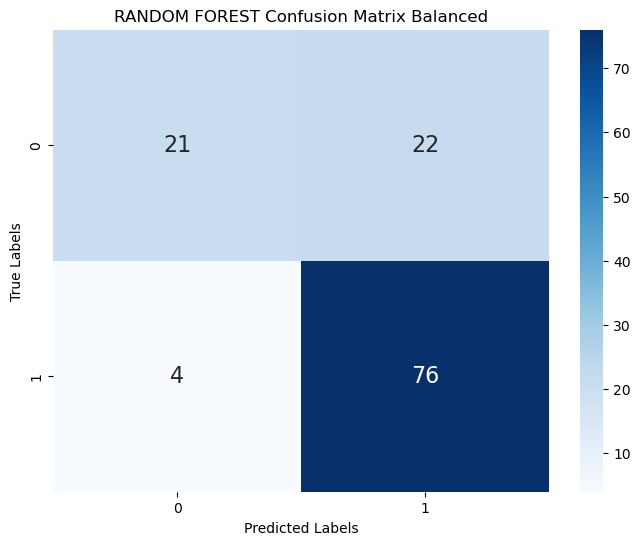

Testing Precision: 0.7755102040816326
Testing Recall: 0.95
Testing F1 Score: 0.8539325842696629


In [60]:
#Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the testing set
rf_cm = confusion_matrix(test_y, y_pred_random_forest)

# Calculate precision, recall, and F1 score for the testing set
rf_test_precision = precision_score(test_y, y_pred_random_forest)
rf_test_recall = recall_score(test_y, y_pred_random_forest)
rf_test_f1 = f1_score(test_y, y_pred_random_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('RANDOM FOREST Confusion Matrix Balanced')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display precision, recall, and F1 score
print("Testing Precision:", rf_test_precision)
print("Testing Recall:", rf_test_recall)
print("Testing F1 Score:", rf_test_f1)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model with adjusted hyperparameters
random_forest_model = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2,class_weight='balanced')

# Fit the model to the training data
random_forest_model.fit(train_X, train_y)

# Evaluate the model's performance on the training data
y_pred_random_forest_train = random_forest_model.predict(train_X)
accuracy_random_forest_train = accuracy_score(train_y, y_pred_random_forest_train)
print("Accuracy Score for Random Forest Classifier (Training):", round(accuracy_random_forest_train * 100, 3), "%")

# Evaluate the model's performance on the test data
y_pred_random_forest_test = random_forest_model.predict(test_X)
accuracy_random_forest_test = accuracy_score(test_y, y_pred_random_forest_test)
print("Accuracy Score for Random Forest Classifier (Test):", round(accuracy_random_forest_test * 100, 3), "%")

Accuracy Score for Random Forest Classifier (Training): 94.297 %
Accuracy Score for Random Forest Classifier (Test): 75.61 %


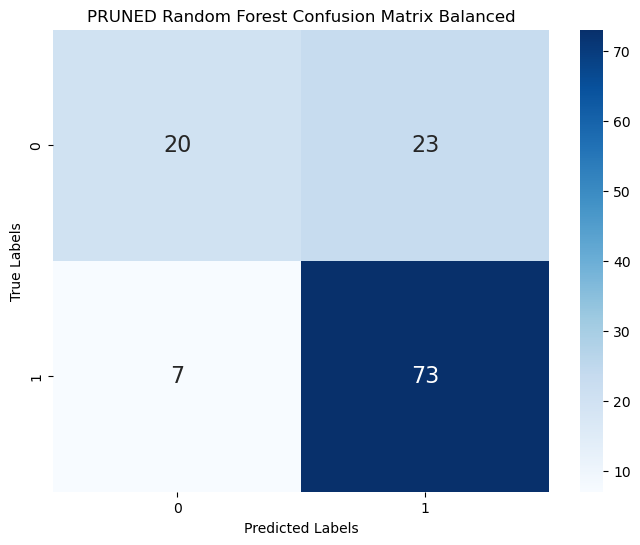

Testing Precision: 0.7604166666666666
Testing Recall: 0.9125
Testing F1 Score: 0.8295454545454546


In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Generate confusion matrix
rf_p_cm = confusion_matrix(test_y, y_pred_random_forest_test)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_p_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('PRUNED Random Forest Confusion Matrix Balanced')
plt.show()

# Calculate precision, recall, and F1 score for the testing set
rf_p_test_precision = precision_score(test_y, y_pred_random_forest_test)
rf_p_test_recall = recall_score(test_y, y_pred_random_forest_test)
rf_p_test_f1 = f1_score(test_y, y_pred_random_forest_test)

# Display precision, recall, and F1 score
print("Testing Precision:", rf_p_test_precision)
print("Testing Recall:", rf_p_test_recall)
print("Testing F1 Score:", rf_p_test_f1)

In [63]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(random_forest_model, train_X, train_y, cv=5)
print("Cross-Validation Scores RF:", scores)
print("Mean Accuracy RF:", scores.mean())

Cross-Validation Scores RF: [0.87878788 0.71428571 0.76530612 0.78571429 0.80612245]
Mean Accuracy RF: 0.79004329004329


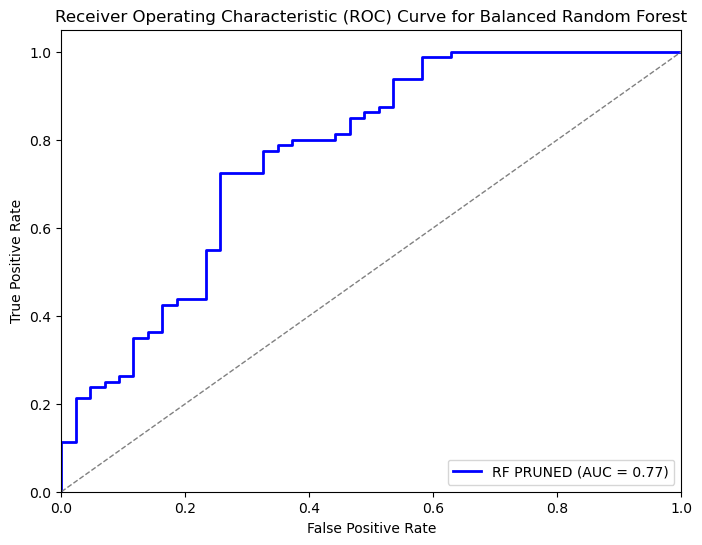

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression model
rf_p_pred_probs = random_forest_model.predict_proba(test_X)[:, 1]

# Calculate ROC curve for Logistic Regression model
fpr_rf, tpr_rf, _ = roc_curve(test_y, rf_p_pred_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'RF PRUNED (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Balanced Random Forest')
plt.legend(loc='lower right')
plt.show()


In [65]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model_nb = SVC(probability=True,class_weight='balanced')

svm_model_nb.fit(train_X, train_y)

SVC(class_weight='balanced', probability=True)

In [66]:
# 3. Make predictions on the train data
y_pred_svm_train_nb = svm_model_nb.predict(train_X)
#print(y_pred_logistic_regression.shape)

# 4. Evaluate the model's performance
accuracy_svm_train_nb = accuracy_score(train_y, y_pred_svm_train_nb)
print("Train accuracy Score for Imbalanced SVM train data:", round(accuracy_svm_train_nb * 100, 3), "%")

Train accuracy Score for Imbalanced SVM train data: 76.578 %


In [67]:
# 3. Make predictions on the test data
y_svm_nb = svm_model_nb.predict(test_X)

# 4. Evaluate the model's performance
accuracy_svm_nb = accuracy_score(test_y, y_svm_nb)
print("Test accuracy Score for SVM: ", round(accuracy_svm_nb* 100, 3), "%")

Test accuracy Score for SVM:  71.545 %


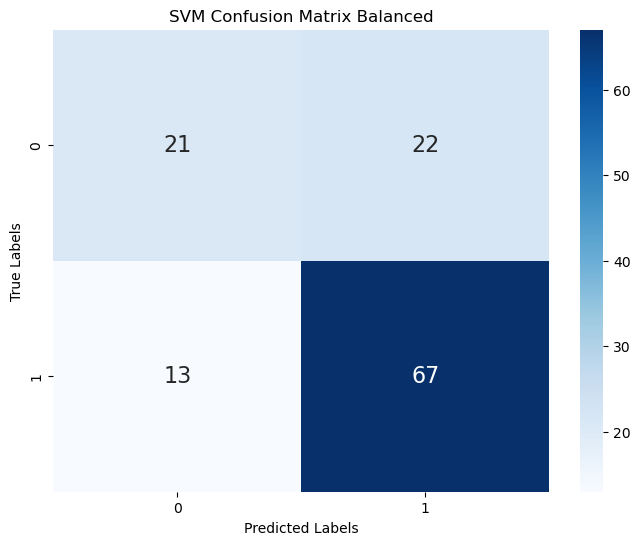

Testing Precision: 0.7528089887640449
Testing Recall: 0.8375
Testing F1 Score: 0.7928994082840237


In [68]:
#Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the testing set
svm_nb_cm = confusion_matrix(test_y, y_svm_nb)

# Calculate precision, recall, and F1 score for the testing set
svm_nb_test_precision = precision_score(test_y, y_svm_nb)
svm_nb_test_recall = recall_score(test_y, y_svm_nb)
svm_nb_test_f1 = f1_score(test_y, y_svm_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_nb_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('SVM Confusion Matrix Balanced')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display precision, recall, and F1 score
print("Testing Precision:", svm_nb_test_precision)
print("Testing Recall:", svm_nb_test_recall)
print("Testing F1 Score:", svm_nb_test_f1)

In [69]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(svm_model_nb, train_X, train_y, cv=5)
print("Cross-Validation Scores SVM:", scores)
print("Mean Accuracy SVM:", scores.mean())

Cross-Validation Scores SVM: [0.58585859 0.56122449 0.69387755 0.73469388 0.7244898 ]
Mean Accuracy SVM: 0.66002886002886


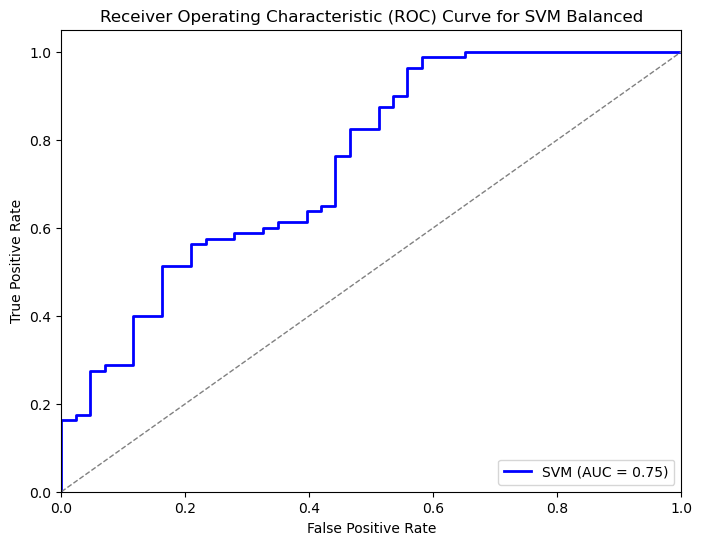

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression model
svm_nb_pred_probs = svm_model_nb.predict_proba(test_X)[:, 1]

# Calculate ROC curve for Logistic Regression model
fpr_svm_nb, tpr_svm_nb, _ = roc_curve(test_y, svm_nb_pred_probs)
roc_auc_svm_nb = auc(fpr_svm_nb, tpr_svm_nb)

# Plot ROC curve for Logistic Regression model
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_nb, tpr_svm_nb, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Balanced')
plt.legend(loc='lower right')
plt.show()

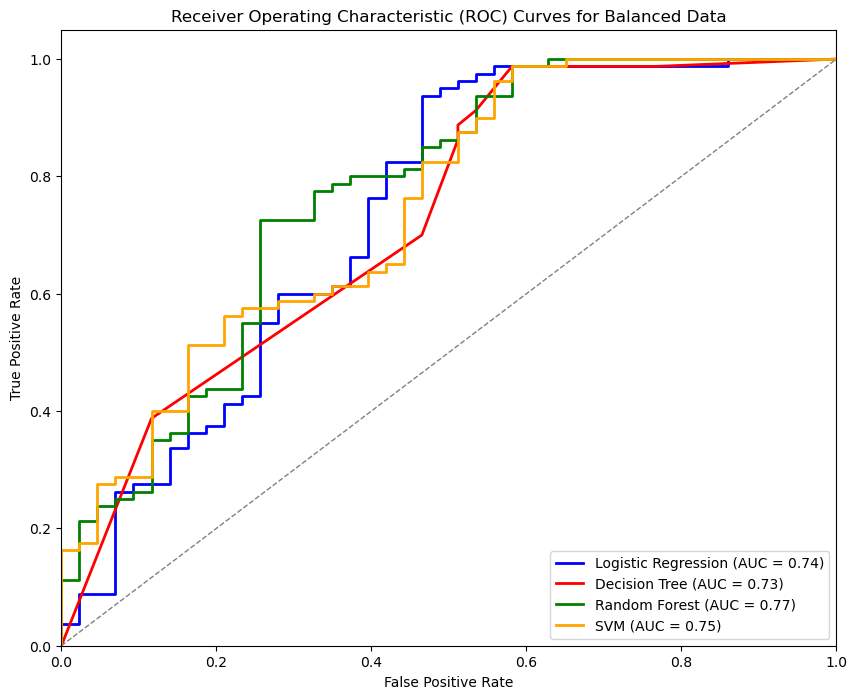

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression model
logistic_pred_probs = logistic_regression_model.predict_proba(test_X)[:, 1]
dt_p_pred_probs = decision_tree_model_pruned.predict_proba(test_X)[:, 1]
rf_p_pred_probs = random_forest_model.predict_proba(test_X)[:, 1]
svm_nb_pred_probs = svm_model_nb.predict_proba(test_X)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_logistic, tpr_logistic, _ = roc_curve(test_y, logistic_pred_probs)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_dt, tpr_dt, _ = roc_curve(test_y, dt_p_pred_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(test_y, rf_p_pred_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(test_y, svm_nb_pred_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Balanced Data')
plt.legend(loc='lower right')
plt.show()
